In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Data analysis and visualization 

In [328]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [329]:
df["class"] = (df["class"] == "g").astype(int)

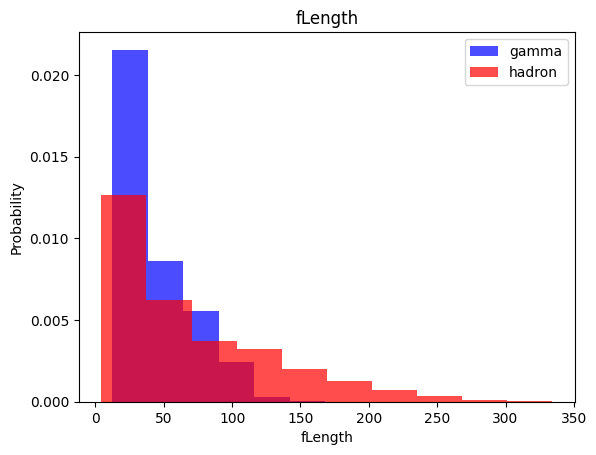

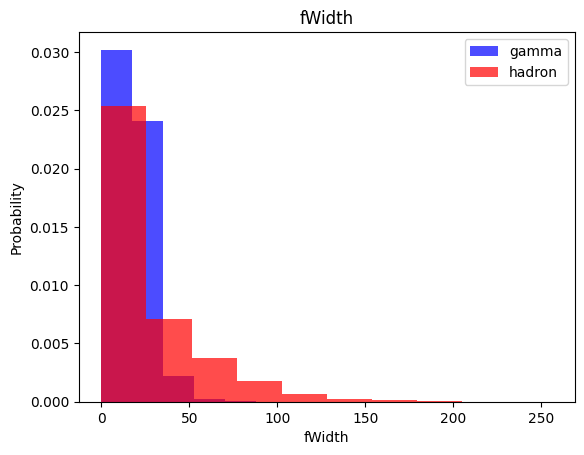

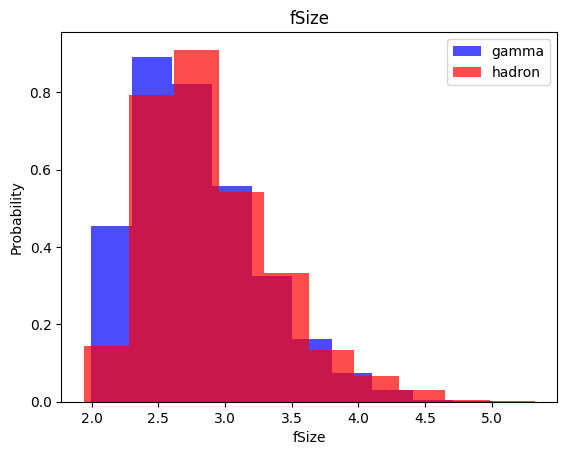

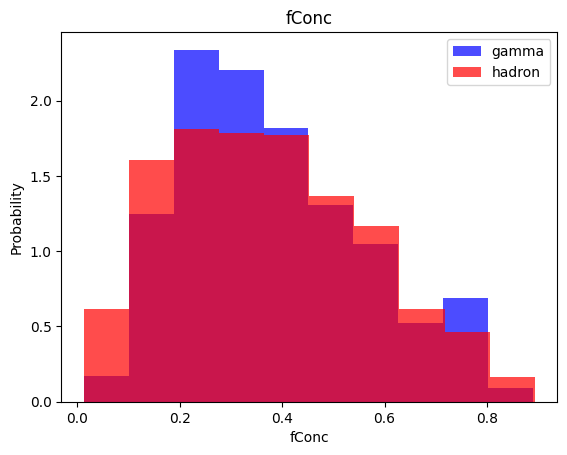

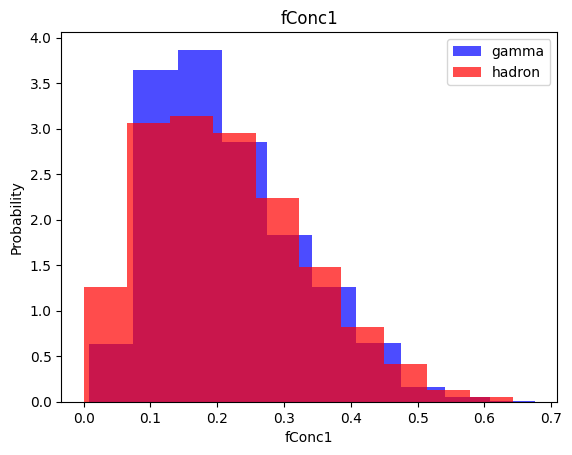

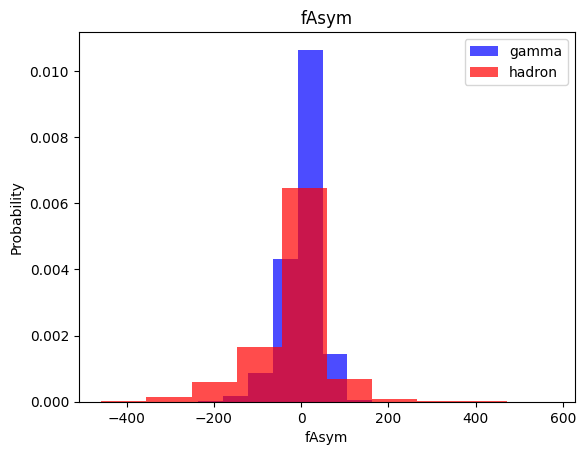

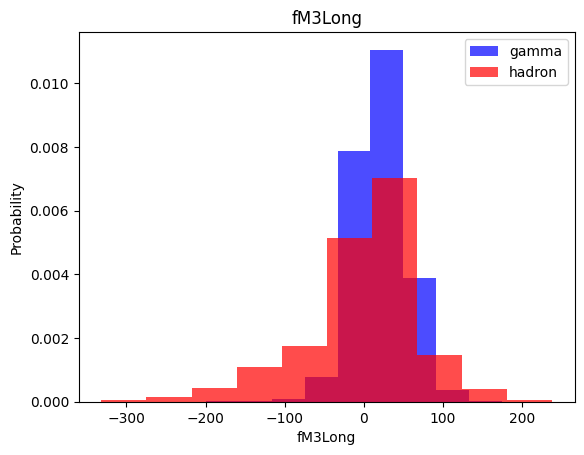

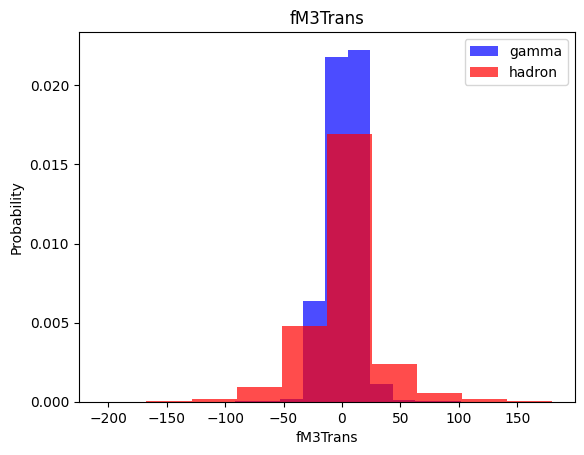

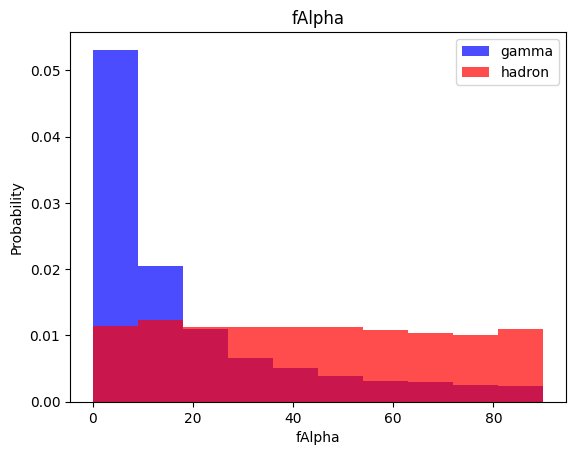

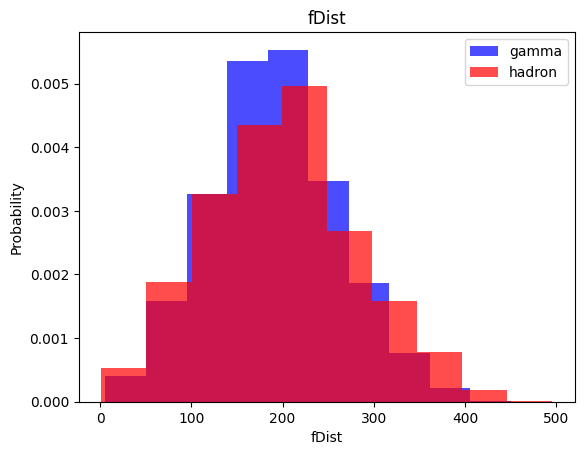

In [330]:
# Display all columns in histogram for g and h class columns
for col in cols[:-1]:
    plt.hist(df[df["class"] == 1][col], label="gamma", color='b', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][col], label="hadron", color='r', alpha=0.7, density=True)
    plt.title(col)
    plt.ylabel("Probability")
    plt.xlabel(col)
    plt.legend()
    plt.show()

# Train, validate and test data

In [331]:

# Creating the train, valid and test data with sample which shuffles it by frac=1 which is all df and 60% of valid samples, 80% of test samples
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df-1)), int(0.8*len(df))])

In [332]:
def scale_dataset(dataframe, oversample=False):
    # Take all valuses without the last one as X and only the last column as Y
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    #  fit: Computes the mean and standard deviation of the data 
    #  transform: Applies the standardization formula to scale the data based on the computed mean and standard deviation
    #  The transformed data is then assigned back to X
    sclaer = StandardScaler()
    X = sclaer.fit_transform(X)

    # Making the data of g and h close to equal, for example len(g) = 2000 and h = 2000, there is not gap
    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)
    

    # Stacking together X, Y on the same data object
    data = np.hstack((X, np.reshape(Y, (-1, 1))))

    return data, X, Y


In [333]:
# Structuring the data by 100%, 60%, 80%
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

# KNN Model


In [334]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [335]:
# Knn Model with n specified noigbors that we want to analyse
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [336]:
# Predict based on Y based on X test datdset
y_predict_knn = knn_model.predict(X_test)

In [337]:
# Report of y_prediction compared to y_test, accuracy 83%
print(classification_report(Y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1294
           1       0.86      0.86      0.86      2510

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes Model

In [338]:
from sklearn.naive_bayes import GaussianNB

In [339]:
# Naive Bayes Model based on probability
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [340]:
y_predict_nb = nb_model.predict(X_test)

In [341]:
print(classification_report(Y_test, y_predict_nb))

              precision    recall  f1-score   support

           0       0.64      0.41      0.50      1294
           1       0.74      0.88      0.81      2510

    accuracy                           0.72      3804
   macro avg       0.69      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression Model


In [342]:
from sklearn.linear_model import LogisticRegression

In [343]:
# Logistic Regression Model based on probability sigmoid function
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [344]:
y_predict_lg = lg_model.predict(X_test)

In [345]:
print(classification_report(Y_test, y_predict_lg))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1294
           1       0.85      0.81      0.83      2510

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



# Support Vector Machines Model

In [346]:
from sklearn.svm import SVC

In [347]:
# Support Vector Machines Model creating the divider of data and support vectors
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [ ]:
y_predict_svm = svm_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1312
           1       0.89      0.90      0.90      2492

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Networks Model

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.grid(True)

    ax2.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)

    plt.show()

In [ ]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
    # Creating the model of 32 by 32 neurons output binary neuron
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
        # Dropout to prevent overfitting and don't train for some values, nodes
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model with a validation of 20% training
    history = nn_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    return nn_model, history

In [ ]:
# Get the results based on inputs
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for learning_rate in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
                plot_history(history)

In [ ]:
# Predicting and converting in binary one dimention data
y_prediction_nn = model.predict(X_test)
y_prediction_nn = (y_prediction_nn > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 2s 9ms/step


In [ ]:
print(classification_report(Y_test, y_prediction_nn))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1313
           1       0.88      0.93      0.90      2491

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804



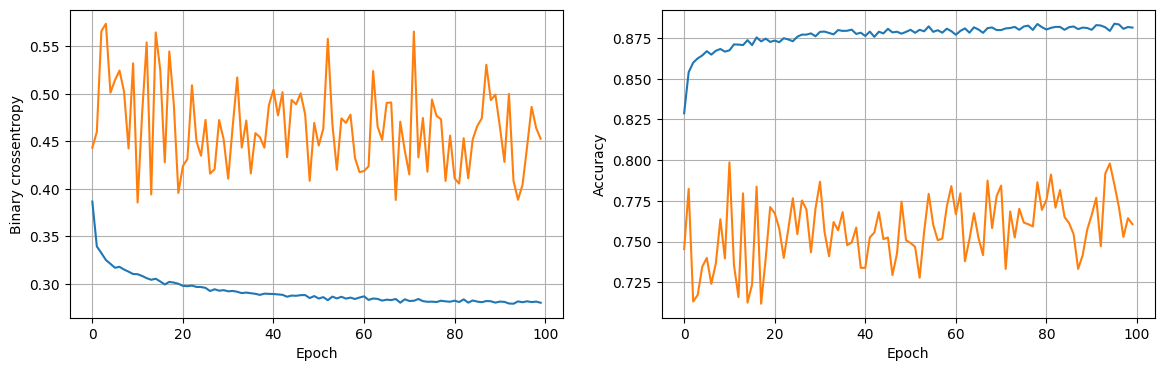

In [ ]:
plot_history(history)

---


In [ ]:
import copy
from sklearn.linear_model import LinearRegression

# Data analysis and visualization 

In [ ]:
data_cols = ["bike_count", "hour", "temp", "humidity", "dew_pt_temp", "radiation", "rain", "snow"]
data_frame = pd.read_csv("SeoulBike.csv").drop(["Date", "Holiday", "Seasons", "Wind speed ", "Visibility ", "Functioning Day"], axis=1)
data_frame.columns = data_cols

# Filter the data by hour = 12 and drop everything else
data_frame = data_frame[data_frame["hour"] == 12]
data_frame = data_frame.drop(["hour"], axis=1)

data_frame.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


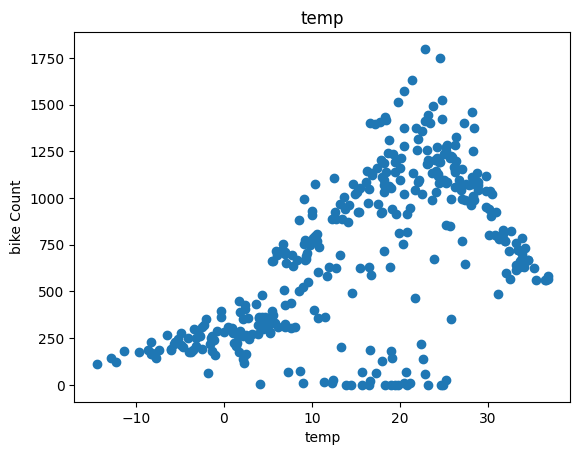

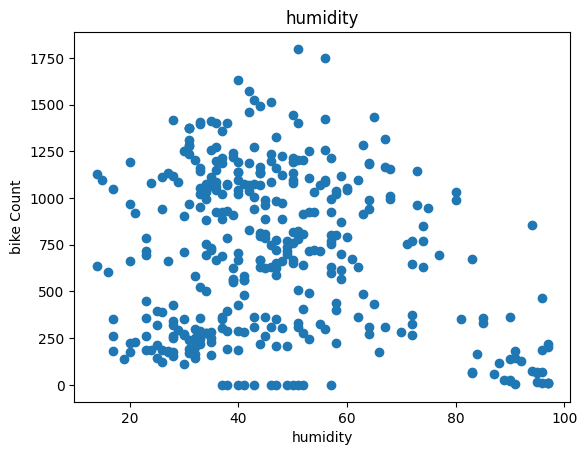

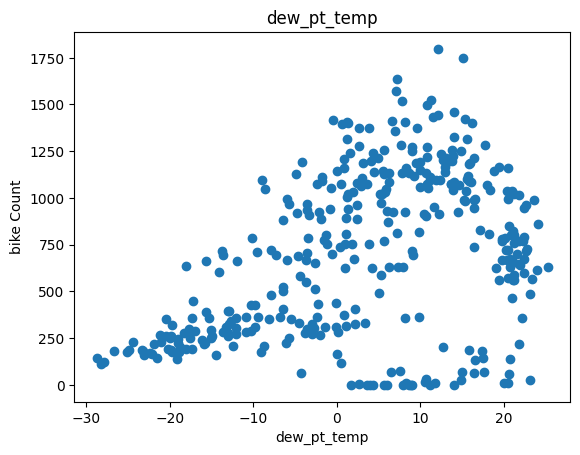

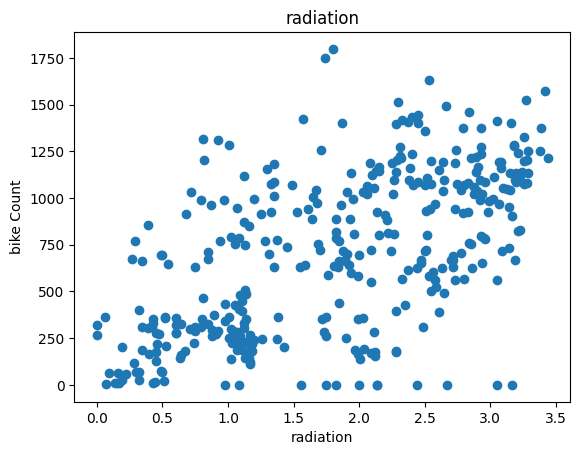

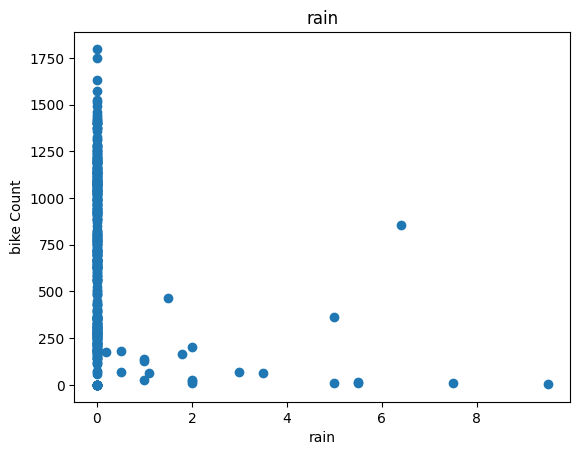

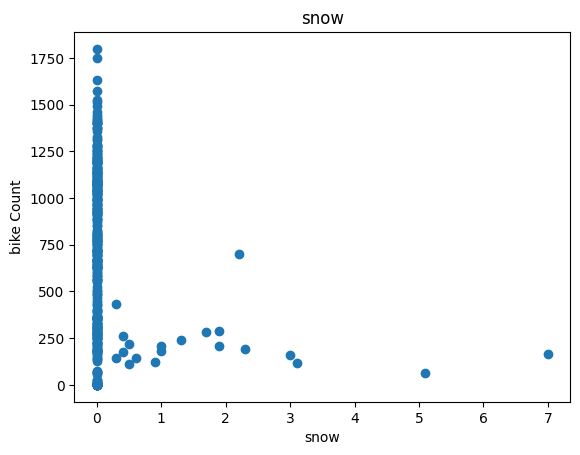

In [ ]:
for col in data_frame.columns[1:]:
    plt.scatter(data_frame[col], data_frame["bike_count"])
    plt.title(col)
    plt.ylabel("bike Count")
    plt.xlabel(col)
    plt.show()

# Train, validate and test data

In [ ]:
train_data, valid_data, test_data = np.split(data_frame.sample(frac=1), [int(0.6*len(data_frame)), int(0.8*len(data_frame))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
    # Making a copy of the data
    dataframe = copy.deepcopy(data_frame)

    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    Y = dataframe[y_label].values.reshape(-1, 1)

    data = np.hstack((X, Y))

    return data, X, Y

In [ ]:
# Training, validating, testing based on temperature because on the graph is well defined
_, x_train_temp, y_train_temp = get_xy(train_data, "bike_count", x_labels=["temp"])
_, x_valid_temp, y_valid_temp = get_xy(valid_data, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test_data, "bike_count", x_labels=["temp"])

# Linear Regression Model

In [ ]:
lrm_model_temp = LinearRegression()
lrm_model_temp.fit(x_train_temp, y_train_temp)

LinearRegression()

In [ ]:
# Get the R squared, higher the result better the correlation
lrm_model_temp.score(x_test_temp, y_test_temp)

0.330867186499053

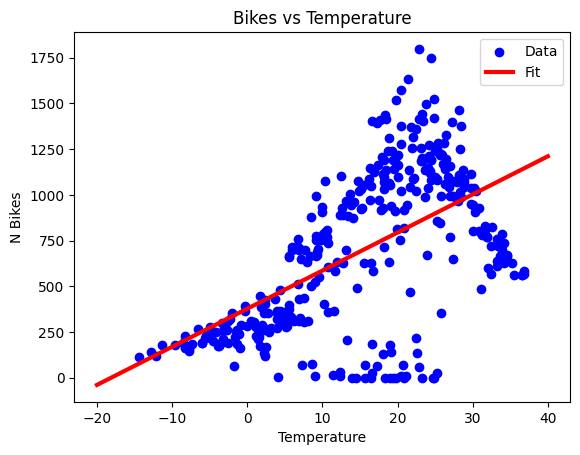

In [ ]:
plt.scatter(x_train_temp, y_train_temp, color="b", label="Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, lrm_model_temp.predict(np.array(x).reshape(-1, 1)), color="r", linewidth=3, label="Fit")
plt.title("Bikes vs Temperature")
plt.ylabel("N Bikes")
plt.xlabel("Temperature")
plt.legend()
plt.show()

# Multiple Linear Regression Model

In [ ]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
train_data, valid_data, test_data = np.split(data_frame.sample(frac=1), [int(0.6*len(data_frame)), int(0.8*len(data_frame))])

# Training, validating, testing based on all columns except bike_count
_, x_train_all, y_train_all = get_xy(train_data, "bike_count", x_labels=data_frame.columns[1:])
_, x_valid_all, y_valid_all = get_xy(valid_data, "bike_count", x_labels=data_frame.columns[1:])
_, x_test_all, y_test_all = get_xy(test_data, "bike_count", x_labels=data_frame.columns[1:])

In [ ]:
mlrg_model_all = LinearRegression()
mlrg_model_all.fit(x_train_all, y_train_all)

LinearRegression()

In [ ]:
# Get the R squared, higher the result better the correlation
mlrg_model_all.score(x_test_all, y_test_all)

0.48323001842092683

# Regression With Neural Network

In [ ]:
# Normalize the data on temperature that's why input shape is 1 and reshape to 1 vector
temp_normalize = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalize.adapt(x_train_temp.reshape(-1))

In [ ]:
# Get the model with just 1 neuron which means a linear function
temp_nn_model = tf.keras.Sequential([
    temp_normalize,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [ ]:
history_temp = temp_nn_model.fit(x_train_temp.reshape(-1), y_train_temp, epochs=1000, validation_data=(x_valid_temp, y_valid_temp))

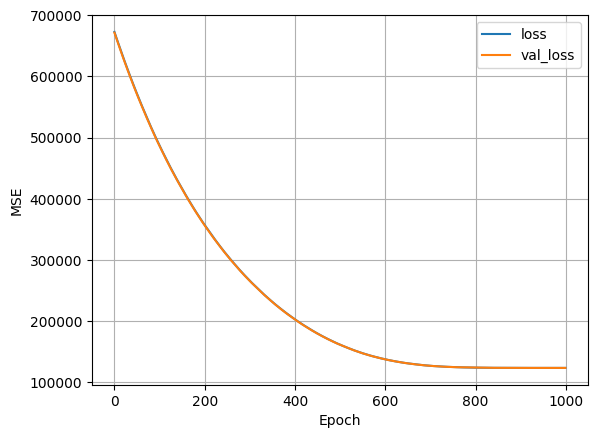

In [ ]:
plot_loss(history_temp)

4/4 [==============================] - 0s 2ms/step


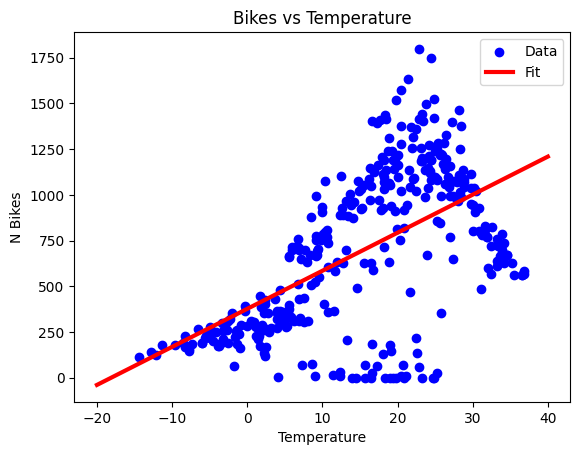

In [ ]:
plt.scatter(x_train_temp, y_train_temp, color="b", label="Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), color="r", linewidth=3, label="Fit")
plt.title("Bikes vs Temperature")
plt.ylabel("N Bikes")
plt.xlabel("Temperature")
plt.legend()
plt.show()

# Neural Network Model

In [ ]:
temp_normalize = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalize.adapt(x_train_temp.reshape(-1))

nn_model_temp = tf.keras.Sequential([
    temp_normalize,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

nn_model_temp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [ ]:
nn_history = nn_model_temp.fit(x_train_temp, y_train_temp, epochs=100, validation_data=(x_valid_temp, y_valid_temp))

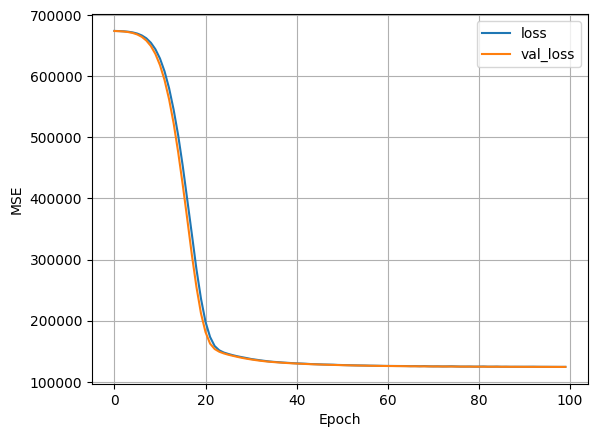

In [ ]:
plot_loss(nn_history)

4/4 [==============================] - 0s 2ms/step


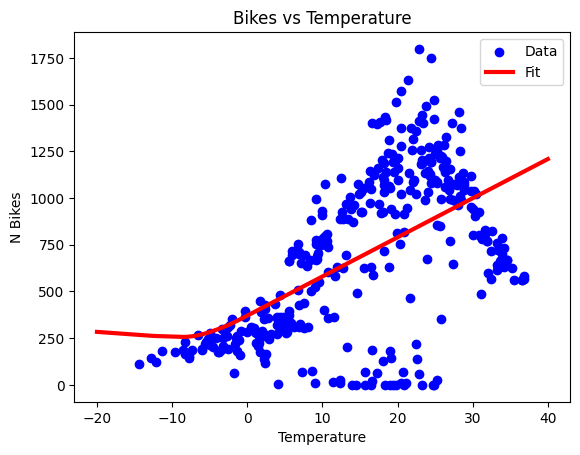

In [ ]:
plt.scatter(x_train_temp, y_train_temp, color="b", label="Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model_temp.predict(np.array(x).reshape(-1, 1)), color="r", linewidth=3, label="Fit")
plt.title("Bikes vs Temperature")
plt.ylabel("N Bikes")
plt.xlabel("Temperature")
plt.legend()
plt.show()

# Multiple Neural Network Model

In [ ]:
all_normalize = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalize.adapt(x_train_all)

nn_model_all = tf.keras.Sequential([
    all_normalize,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

nn_model_all.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [ ]:
nn_history_all = nn_model_all.fit(x_train_all, y_train_all, epochs=100, validation_data=(x_valid_all, y_valid_all))

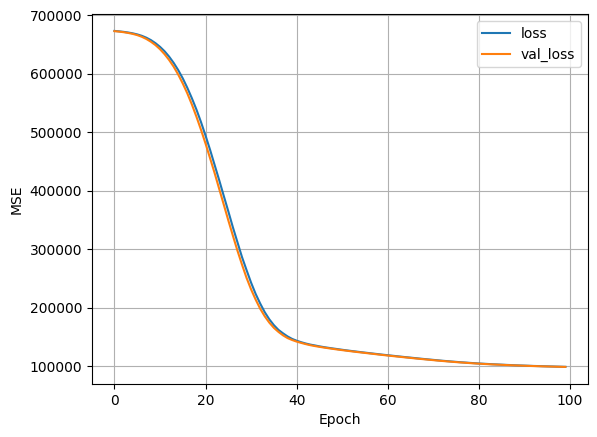

In [ ]:
plot_loss(nn_history_all)

# MLR & NN Predictions

In [ ]:
# Prdicting based on the 2 models
y_predict_mlr = mlrg_model_all.predict(x_test_all)
y_predict_nn = nn_model_all.predict(x_test_all)

12/12 [==============================] - 0s 2ms/step


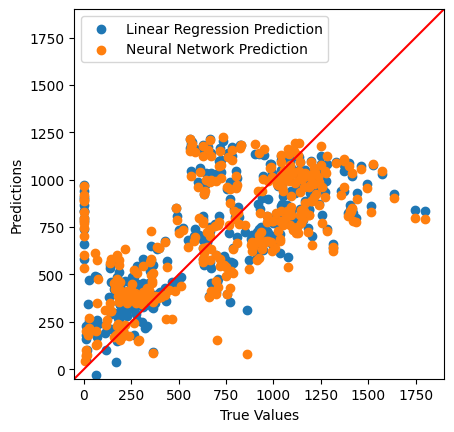

In [ ]:
axe = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_predict_mlr, label="Linear Regression Prediction")
plt.scatter(y_test_all, y_predict_nn, label="Neural Network Prediction")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
limits = [-50, 1900]
plt.xlim(limits)
plt.ylim(limits)
_ = plt.plot(limits, limits, color="r")

# Data analysis and visualization 

In [4]:
import seaborn as sns

In [10]:
# sep \s+ will separate all the spaces
columns = ["area", "perimeter", "compactness", "length", "width", "asymetry", "groove", "class"]
data_f = pd.read_csv("seeds_dataset.txt", names=columns, sep="\s+")
data_f.head()

,area,perimeter,compactness,length,width,asymetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


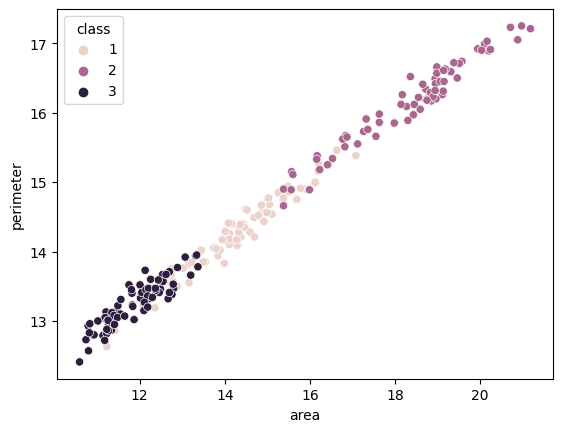

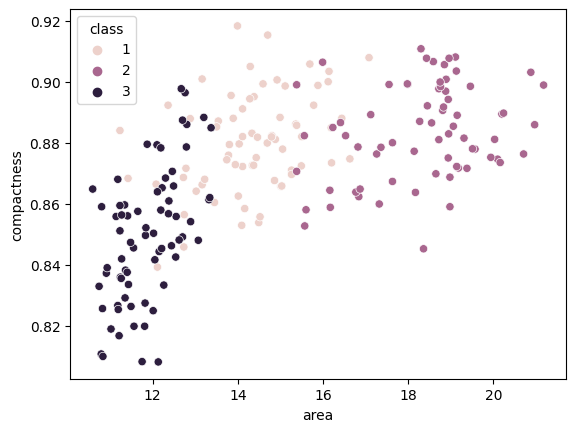

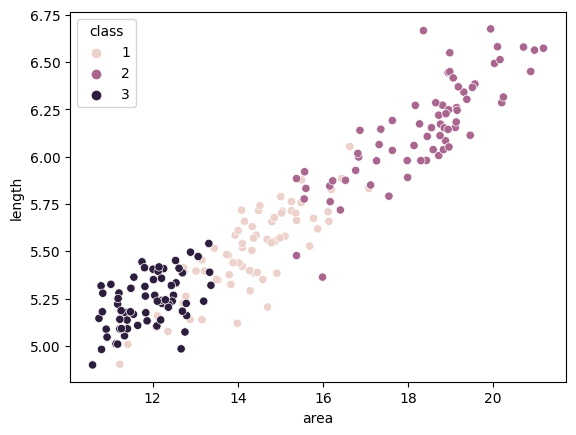

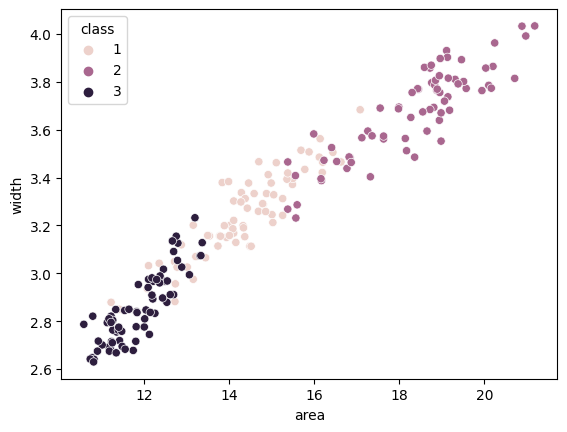

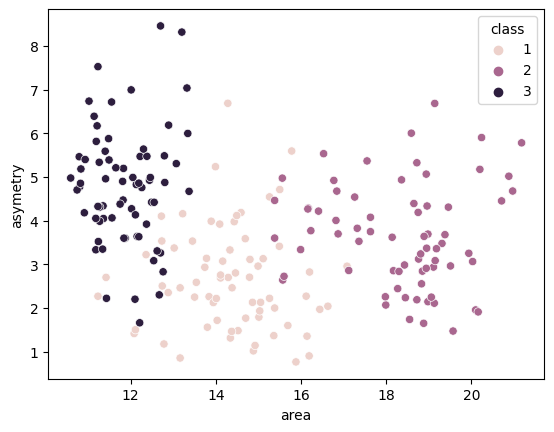

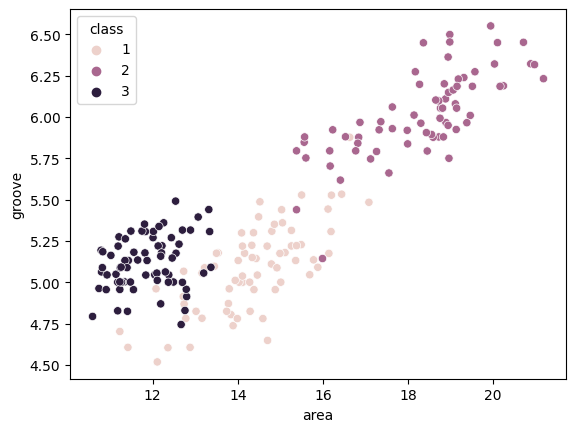

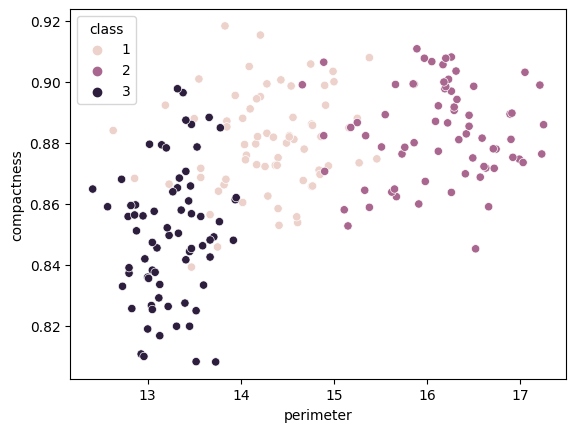

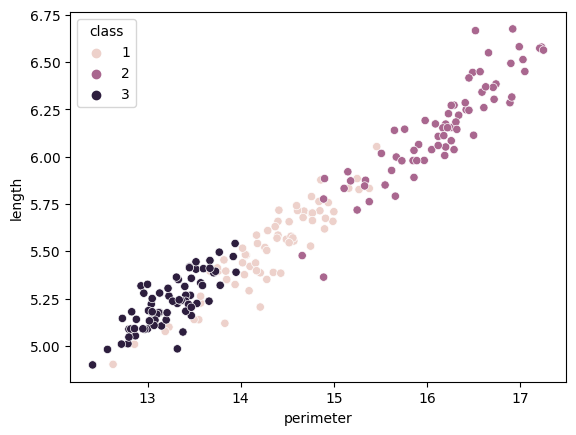

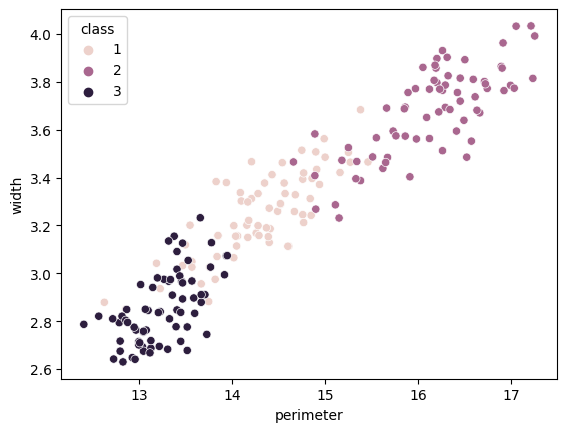

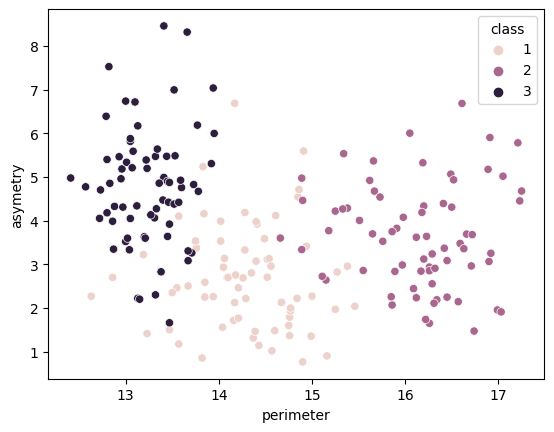

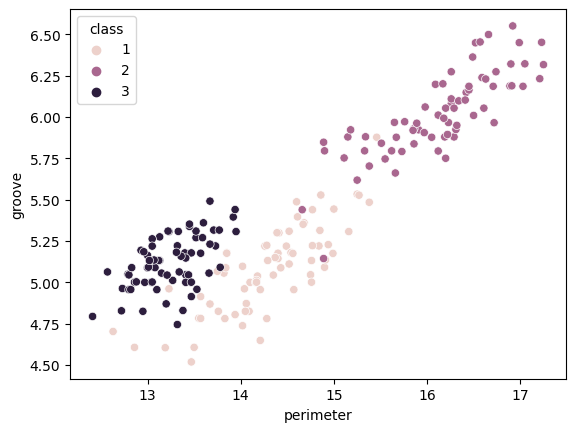

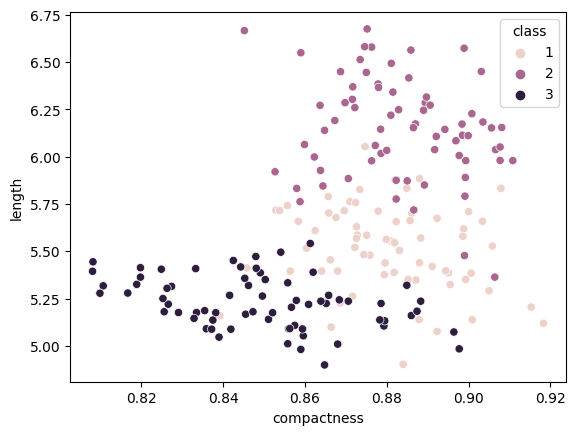

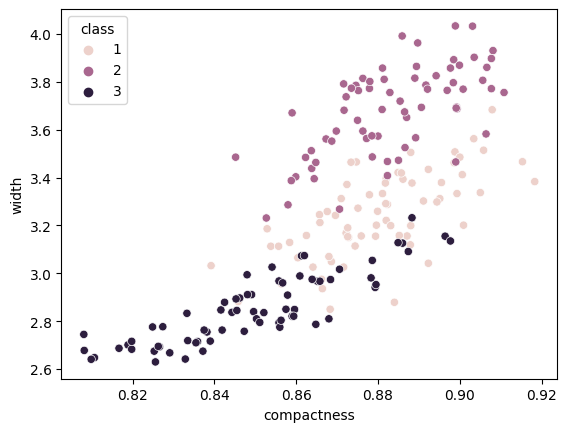

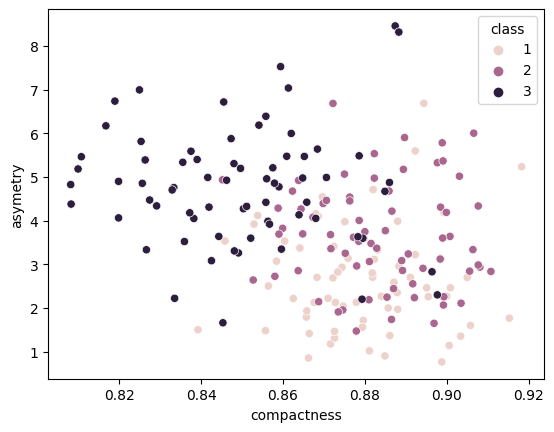

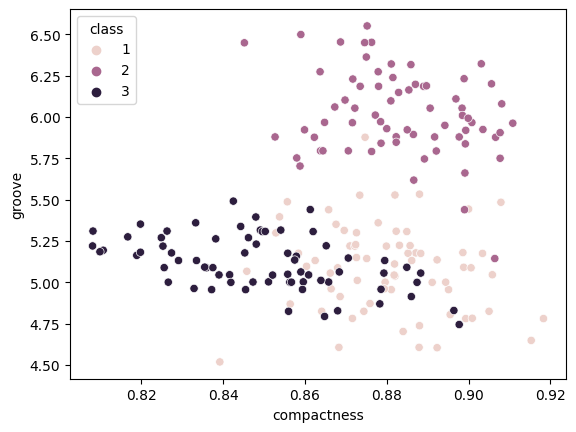

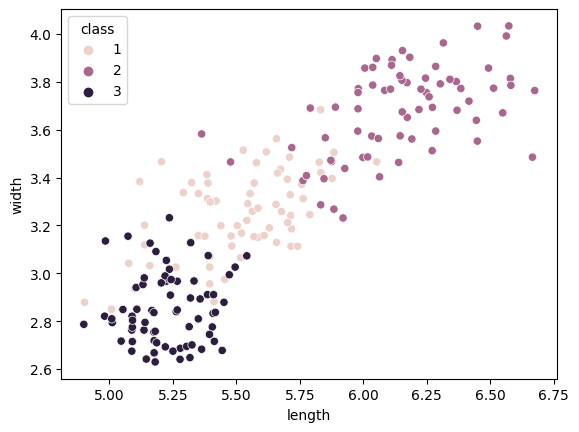

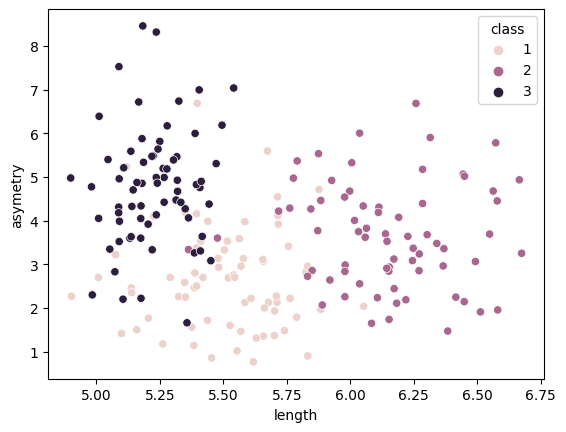

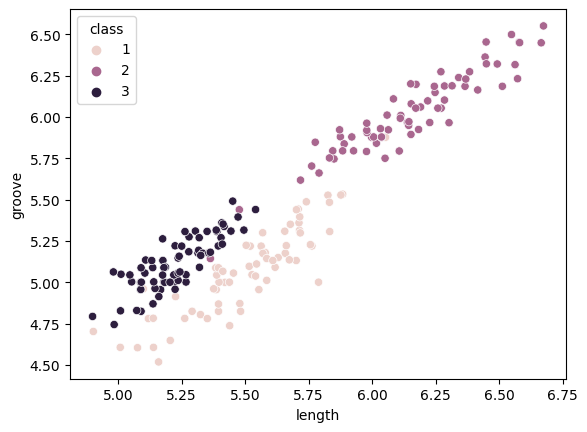

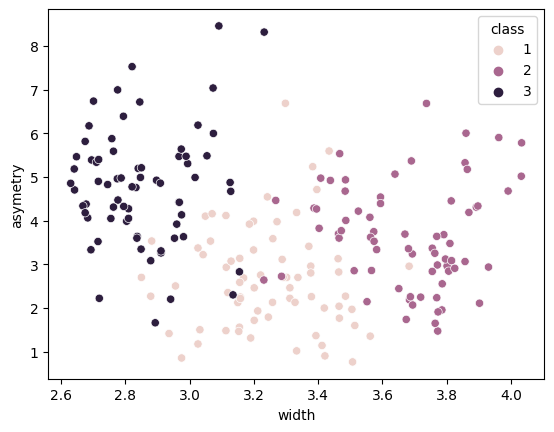

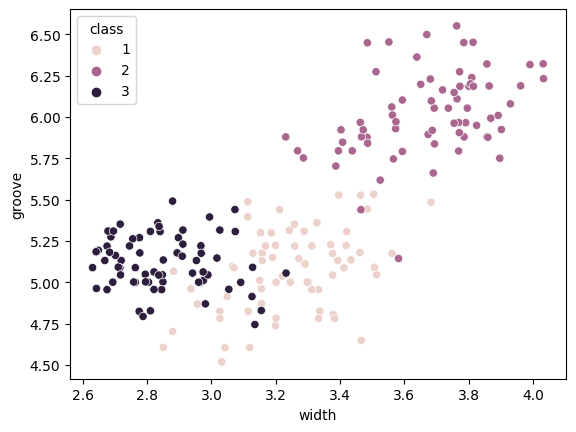

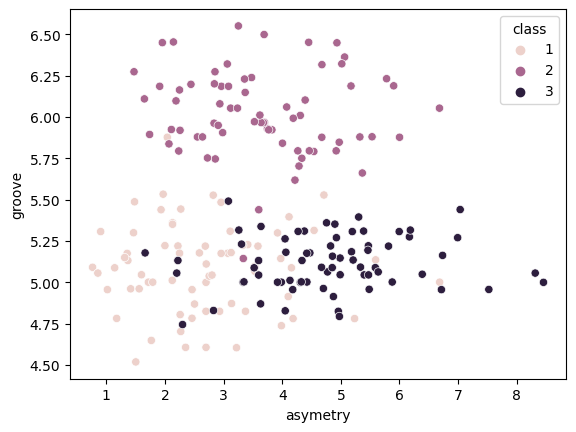

In [22]:
# Take first column as i and next column as j
for i in range(len(columns)-1):
    for j in range(i+1, len(columns)-1):
        x_label = columns[i]
        y_label = columns[j]
        sns.scatterplot(x=x_label, y=y_label, data=data_f, hue="class")
        plt.show()

# K Means Clustering Model

In [23]:
from sklearn.cluster import KMeans

In [24]:
# Analyse based on perimeter and asymetry data
p = "perimeter"
a = "asymetry"
values = data_f[[p, a]].values

In [26]:
# Creating the model
kmc_model = KMeans(n_clusters=3).fit(values)

c:\Users\UserHome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Building the clusters
clusters = kmc_model.labels_

In [31]:
# Build dataframe of values and clusters
clusters_df = pd.DataFrame(np.hstack((values, clusters.reshape(-1, 1))), columns=[p, a, "class"])

[]

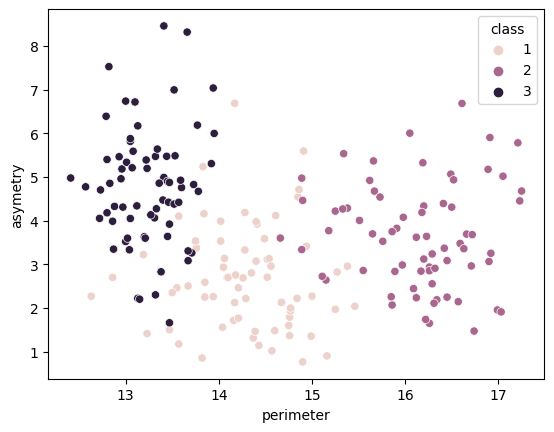

In [34]:
# original classes
sns.scatterplot(x=p, y=a, hue="class", data=data_f)
plt.plot()

[]

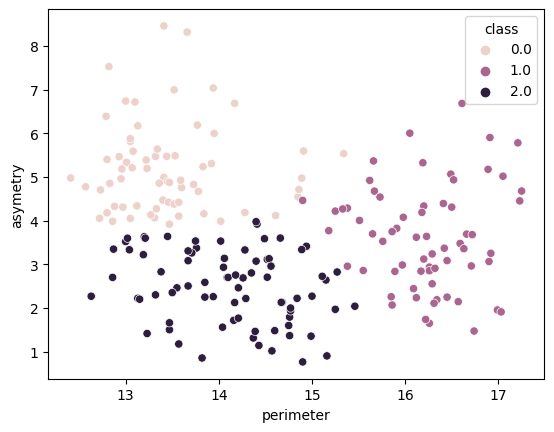

In [33]:
# k mean classes
sns.scatterplot(x=p, y=a, hue="class", data=clusters_df)
plt.plot()

# Higher Dimensions

In [59]:
columns_model = data_f[columns[:-1]].values

In [60]:
# Using KMeans to estimate the clusters
k_means = KMeans(n_clusters=3).fit(columns_model)

c:\Users\UserHome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
# Build the dataframe
clusters_dataframe = pd.DataFrame(np.hstack((columns_model, clusters.reshape(-1, 1))), columns=data_f.columns)

[]

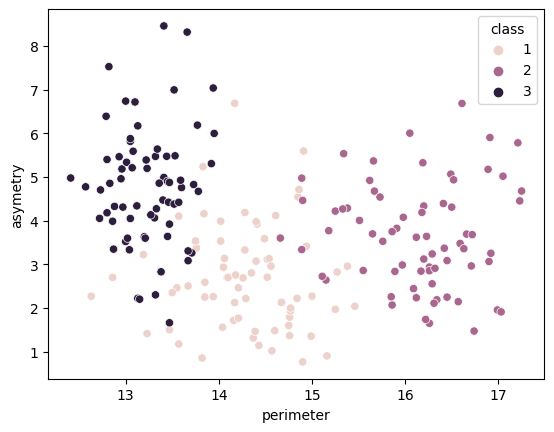

In [63]:
# original classes
sns.scatterplot(x=p, y=a, hue="class", data=data_f)
plt.plot()

[]

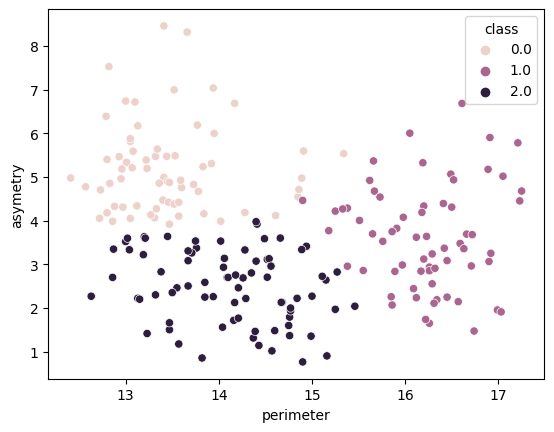

In [62]:
# k means clusters
sns.scatterplot(x=p, y=a, hue="class", data=clusters_dataframe)
plt.plot()

# Principal Component Analysis Model

In [64]:
from sklearn.decomposition import PCA

In [65]:
# Selecting the top 2 dimensions 
pca_model = PCA(n_components=2)
transform_model = pca_model.fit_transform(columns_model)

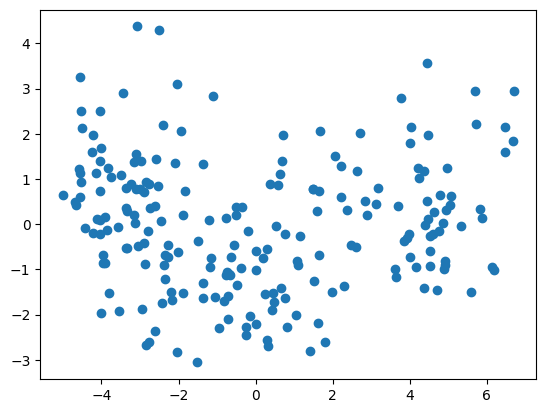

In [71]:
# Representing the data in 2 dimensions
plt.scatter(transform_model[:,0], transform_model[:,1])
plt.show()